# РК №2

## Рубежный контроль №2,вариант №5, Емельянова Т.И.

### Задание
Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

### Вариант
В качестве методов по варианту необходимо использовать метод опорных векторов и градиентный бустинг.
Датасет доступен по следующей сссылке: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

### Исследование данных

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
%matplotlib inline 
sns.set(style="ticks")

In [2]:
dataset = pd.read_csv('datasets/heart.csv')

In [3]:
print(dataset.shape[0], 'x', dataset.shape[1])

1025 x 14


In [4]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Значения атрибутов из таблицы:

1) age - возраст
2) sex - пол
3) cp - тип боли в груди (chest pain type; 4 вида)
4) trestbps - артериальное давление в покое (resting blood pressure)
5) chol - холестерин сыворотки в мг/дл (serum cholestoral in mg/dl)
6) fbs - уровень сахара в крови натощак > 120 мг/дл
7) restecg - результаты электрокардиографии в покое (значения 0,1,2)
8) thalach - достигнутая максимальная частота сердечных сокращений
9) exang - стенокардия, вызванная физической нагрузкой
10) oldpeak - депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
11) slope - наклон пикового сегмента ST при нагрузке
12) ca - количество крупных сосудов (0-3), окрашенных при флюороскопии
13) thal - 0 = нормальный; 1 = фиксированный дефект; 2 = обратимый дефект
14) target - это поле относится к наличию болезни сердца у пациента. Это целочисленное значение 0 = отсутствие болезни и 1 = болезнь


In [9]:
dataset.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [10]:
print('Число уникальных значений для каждого столбца')
dataset.nunique()

Число уникальных значений для каждого столбца


age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [11]:
print('Число пропусков')
dataset.isna().sum()

Число пропусков


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Классификация. Метод опорных векторов (SVM).

In [5]:
from sklearn import svm
from sklearn.model_selection import train_test_split

In [30]:
data_train, data_test = train_test_split(dataset, test_size=0.33, random_state=42)

predict_attributes = ["chol", "trestbps"]

X = data_train[predict_attributes]
y = data_train[["target"]].values.ravel()
clf = svm.SVC(C=1.0, kernel='linear').fit(X, y)
predict_survived = clf.predict(data_test[predict_attributes])
print(predict_survived)

[1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0
 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1
 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0
 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1
 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0
 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1
 1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1
 1 0 0 0 0 1]


C:\Users\Tatyana\AppData\Local\Temp\ipykernel_16248\3263723724.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classified_dataset["target"] = predict_survived


<Axes: xlabel='chol', ylabel='trestbps'>

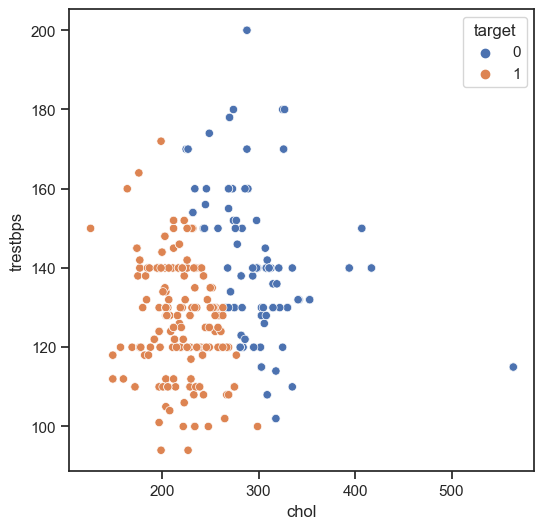

In [31]:
classified_dataset = data_test[predict_attributes]
classified_dataset["target"] = predict_survived


fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(ax=ax, x='chol', y='trestbps', data=classified_dataset, hue='target')

### Регрессия. Градиентный бустинг.